<h1 align=center>Modified Model with Three Features</h1>
<h2 align=center>Ben Bland</h2>

In [1]:
#Using features Age, Body Mass Index, and Blood Pressure to hopefully improve model accuracy
%matplotlib inline
import numpy as np

from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()
X=diabetes.data
y=diabetes.target

#Placing dataset into a dataframe
import pandas as pd
pd.DataFrame(X, columns=['Age','Sex','BMI','BP','S1','S2','S3','S4','S5','S6']).tail()

,Age,Sex,BMI,BP,S1,S2,S3,S4,S5,S6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


In [2]:
#Changing the features
features = (0,2,3)
X = X[:, features]

In [3]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [4]:
print('X_train.shape: {}'.format(X_train.shape))
print('y_train.shape: {}'.format(y_train.shape))
print('X_test.shape: {}'.format(X_test.shape))
print('y_test.shape: {}'.format(y_test.shape))

X_train.shape: (331, 3)
y_train.shape: (331,)
X_test.shape: (111, 3)
y_test.shape: (111,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D4E5F4978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025D4EC376A0>]], dtype=object)

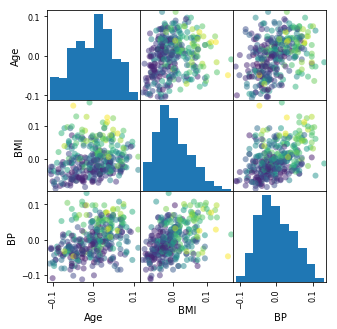

In [6]:
diabetes_dataframe = pd.DataFrame(X_train, columns=['Age','BMI','BP'])

pd.plotting.scatter_matrix(diabetes_dataframe, c=y_train, figsize=(5,5), marker='o', hist_kwds={'bins':10})

In [7]:
#Instantiate the model with default parameters (i.e. create an instance of the model)
#This is ordinary least squares regression OLS
regr = linear_model.LinearRegression()

#Training the model (i.e. fitting the model with training data)
regr.fit(X_train,y_train)

#Printing the coefficients
print(regr.coef_)

[  -5.95979463  855.77998295  385.38938424]


In [8]:
#Predicting y-value based on the training data. 

X_new=np.array([0.037812, 0.38172, 0.053850])
#Reshape the array so that NumPy can use it
X_new=np.reshape(X_new, (1,-1))
print('X_new shape: {}'.format(X_new.shape))

X_new shape: (1, 3)


In [9]:
prediction = regr.predict(X_new)
print('Prediction is: {}'.format(prediction))
print(regr.score(X_test,y_test))

Prediction is: [ 500.58067697]
0.245575577262
